In [1]:
import os
from modules import power_module
from shapely.geometry import Point, Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
def create_shapefile(DEVICE_POWER, crs=None):
    Power = []
    Polys = []
    for _, device in DEVICE_POWER.iterrows():
        Polys.append(Polygon([Point(x,y) for x,y in zip(device["polyx"], device["polyy"])]))
        Power.append(device['Power [W]']*1e-6)
    GPD = gpd.GeoDataFrame({'Device':DEVICE_POWER.index.values,
                        'Power MW' : Power},
                        geometry = gpd.GeoSeries(Polys)).set_crs(epsg=crs)    
    GPD = GPD.set_index('Device')
    return GPD

In [3]:
power_files = r"C:\Projects\C1308_SEAT\DEMO_FILES_Tabbed\DEMO Files Tabbed GUI\pacwave\power_files\4x4"
probabilities_file = r"C:\Projects\C1308_SEAT\DEMO_FILES_Tabbed\DEMO Files Tabbed GUI\pacwave\probabilities\hydrodynamic_probabilities.csv"
save_path = r"C:\Projects\C1308_SEAT\DEMO_FILES_Tabbed\DEMO Files Tabbed GUI\pacwave\Output\test_power"
os.makedirs(save_path, exist_ok=True)
DEVICE_POWER = power_module.calculate_power(power_files, probabilities_file, save_path=save_path, crs=4326)

c:\Projects\C1308_SEAT\seat-qgis-plugin\seat\modules\power_module.py:408: RuntimeWarning: divide by zero encountered in log10
  np.log10(Power_Scaled[:, ic]), width=1, edgecolor='black')
c:\Projects\C1308_SEAT\seat-qgis-plugin\seat\modules\power_module.py:426: RuntimeWarning: divide by zero encountered in log10
  0])+1, np.log10(np.sum(Power_Scaled, axis=1)), width=1, edgecolor='black')


In [4]:
GPD = create_shapefile(DEVICE_POWER, crs=4326)
GPD.to_file(os.path.join(save_path, 'Power_Generated_MW.shp'))
GPD

Power MW                                           geometry
Device                                                               
001     199.789025  POLYGON ((235.76617 44.55978, 235.76617 44.560...
002     169.291965  POLYGON ((235.76937 44.55978, 235.76937 44.560...
003     218.194378  POLYGON ((235.77257 44.55978, 235.77257 44.560...
004     214.975840  POLYGON ((235.77577 44.55978, 235.77577 44.560...
005     197.689234  POLYGON ((235.76617 44.56378, 235.76617 44.564...
006     166.794692  POLYGON ((235.76937 44.56377, 235.76937 44.564...
007     201.644904  POLYGON ((235.77257 44.56377, 235.77257 44.564...
008     184.628386  POLYGON ((235.77577 44.56378, 235.77577 44.564...
009     197.023770  POLYGON ((235.76617 44.56778, 235.76617 44.568...
010     166.534629  POLYGON ((235.76937 44.56778, 235.76937 44.568...
011     199.193469  POLYGON ((235.77257 44.56778, 235.77257 44.568...
012     177.857040  POLYGON ((235.77577 44.56778, 235.77577 44.568...
013     193.591085  POLYGON ((235.76617 44.57178, 235.76617 44.572...
014     164.054437  POLYGON ((235.76937 44.57178, 235.76937 44.572...
015     211.062167  POLYGON ((235.77257 44.57178, 235.77257 44.572...
016     185.589956  POLYGON ((235.77577 44.57178, 235.77577 44.572...
017     189.706037  POLYGON ((235.76617 44.57578, 235.76617 44.576...
018     162.084805  POLYGON ((235.76937 44.57578, 235.76937 44.576...
019     211.163351  POLYGON ((235.77257 44.57578, 235.77257 44.576...
020     183.598113  POLYGON ((235.77577 44.57578, 235.77577 44.576...
021     186.824442  POLYGON ((235.76617 44.57977, 235.76617 44.580...
022     159.629814  POLYGON ((235.76937 44.57977, 235.76937 44.580...
023     191.061738  POLYGON ((235.77257 44.57977, 235.77257 44.580...
024     166.573500  POLYGON ((235.77577 44.57977, 235.77577 44.580...
025     182.631952  POLYGON ((235.76617 44.58378, 235.76617 44.584...
026     156.811533  POLYGON ((235.76937 44.58378, 235.76937 44.584...
027     189.518050  POLYGON ((235.77257 44.58378, 235.77257 44.584...
028     172.556435  POLYGON ((235.77577 44.58378, 235.77577 44.584...

<AxesSubplot:>

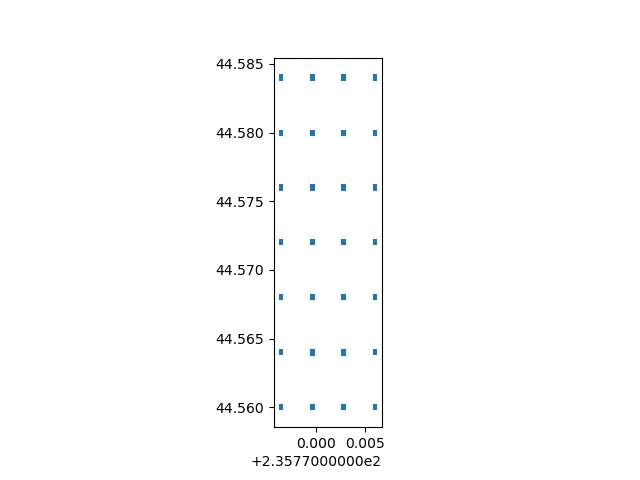

In [6]:
fig,ax = plt.subplots()
GPD.plot(ax=ax)